In [1]:
import numpy as np
import mne
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)

In [2]:
#Load EEG data and define non-standard channels (set up iterative loop once mne figured out)
raw = mne.io.read_raw_bdf("/Users/scottmcelroy/smm_code/sdlab_data/THC-IOM_for_Salva/TI001-SA244/Day 1/postTI001A20.bdf")
raw.load_data()
raw.set_channel_types({'HEO1': 'eog'})
raw.set_channel_types({'HEO2': 'eog'})
raw.set_channel_types({'VEO1': 'eog'})
raw.set_channel_types({'VEO2': 'eog'})
raw.set_eeg_reference(ref_channels=['M1', 'M2'])
raw.set_eeg_reference(ref_channels=['NOSE'])
raw.drop_channels(['M1', 'M2', 'NOSE', 'EXG8'])

Extracting EDF parameters from /Users/scottmcelroy/smm_code/sdlab_data/THC-IOM_for_Salva/TI001-SA244/Day 1/postTI001A20.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 64511  =      0.000 ...    62.999 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


<RawEDF | postTI001A20.bdf, 69 x 64512 (63.0 s), ~34.0 MB, data loaded>

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 64 channels>


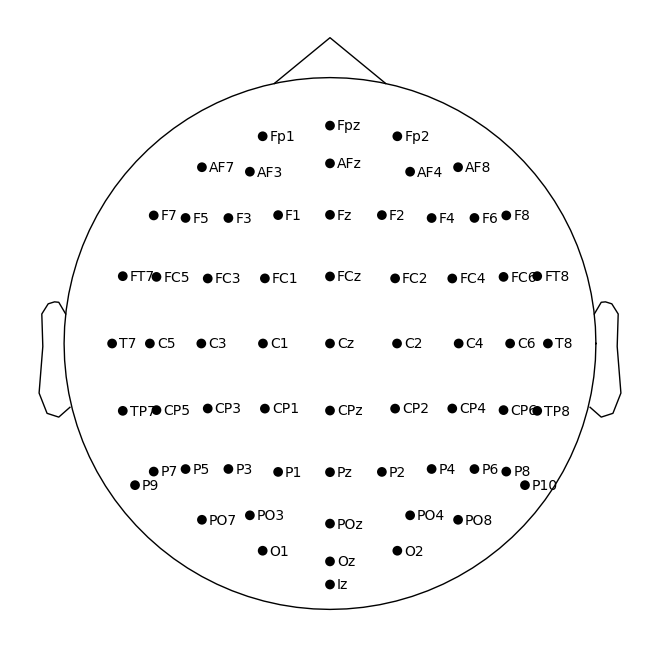

<RawEDF | postTI001A20.bdf, 69 x 64512 (63.0 s), ~34.1 MB, data loaded>

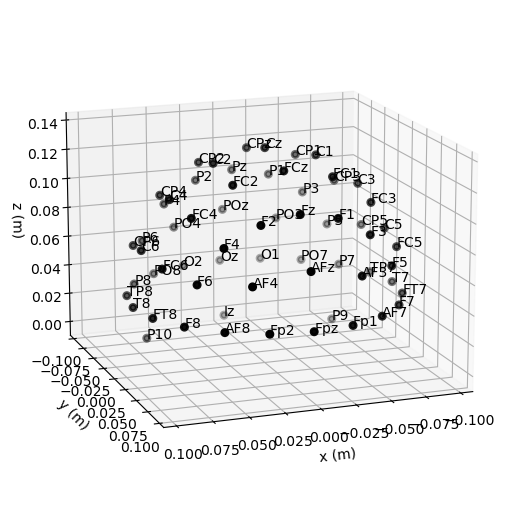

In [3]:
#Establish montage to assign EEG channels to 3D locations
std_montage = mne.channels.make_standard_montage('biosemi64')
print(std_montage)
std_montage.plot()
fig = std_montage.plot(kind='3d', show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15) 
raw.set_montage(std_montage, on_missing='warn')

In [4]:
n_time_samps = raw.n_times
time_secs = raw.times
ch_names = raw.ch_names
n_chan = len(ch_names)  # note: there is no raw.n_channels attribute

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.250 (s)
Using matplotlib as 2D backend.


/Users/scottmcelroy/opt/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


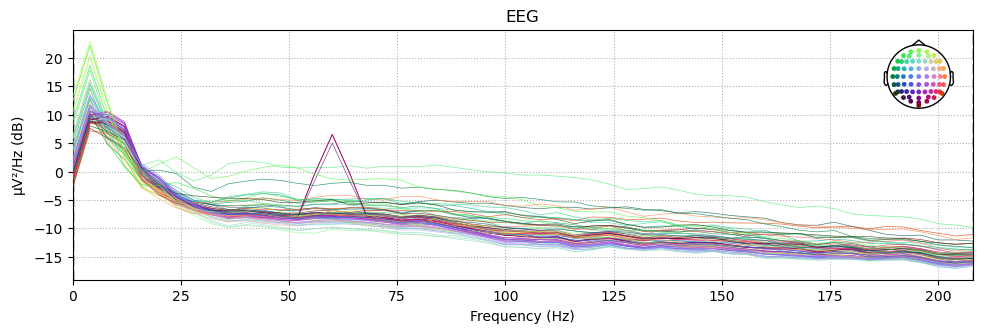

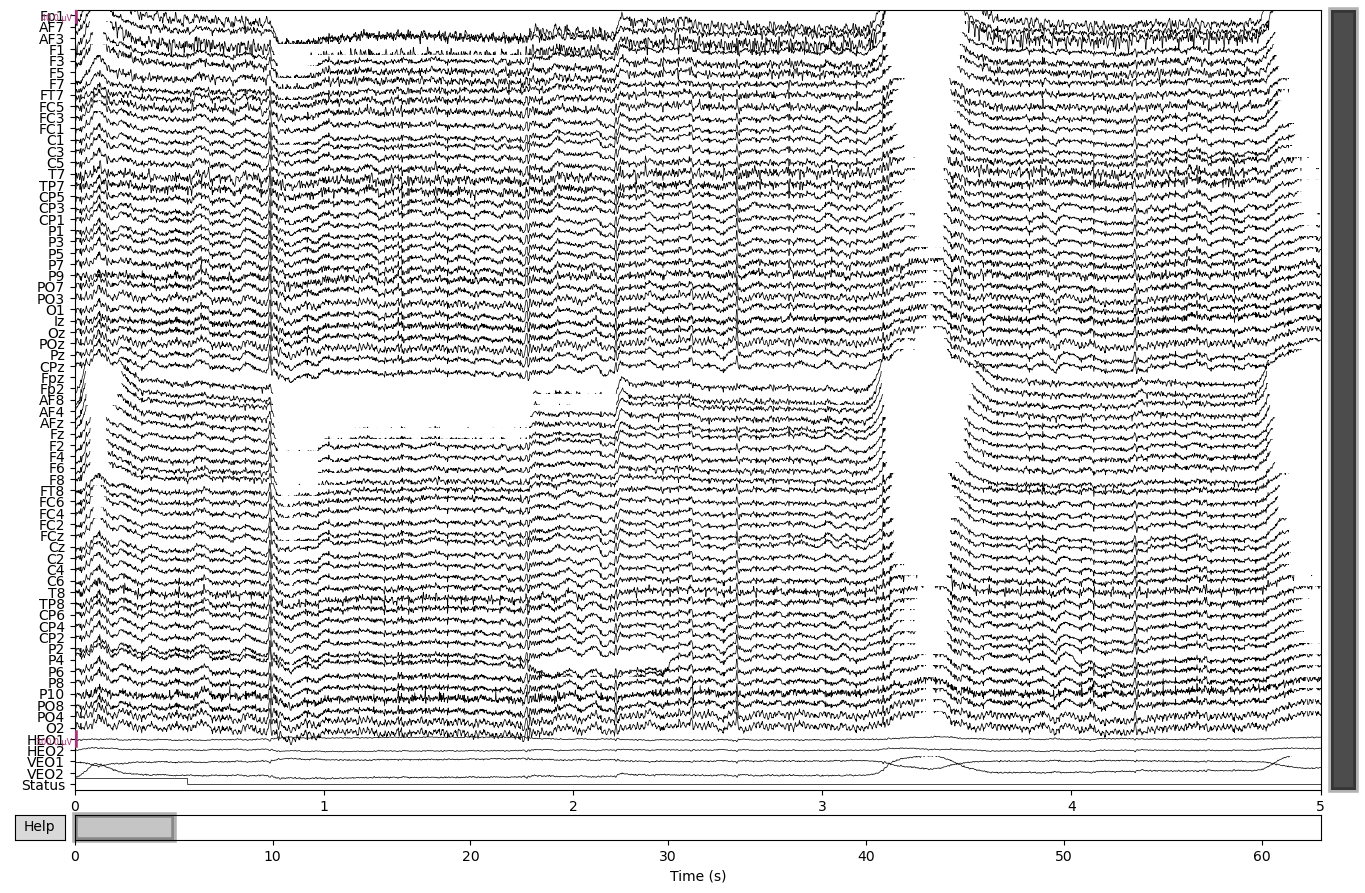

Effective window size : 0.250 (s)


/Users/scottmcelroy/opt/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


In [5]:
#measure of signal's power content versus frequency. A PSD is typically used to characterize broadband random signals
raw.plot_psd(fmax=210);
raw_plot = raw.plot(duration=5, n_channels=72);
raw_plot.set_size_inches(10,10)
spectrum = raw.compute_psd();
spectrum.plot(average=True);

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 33793 samples (33.001 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.3s finished
/Users/scottmcelroy/opt/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


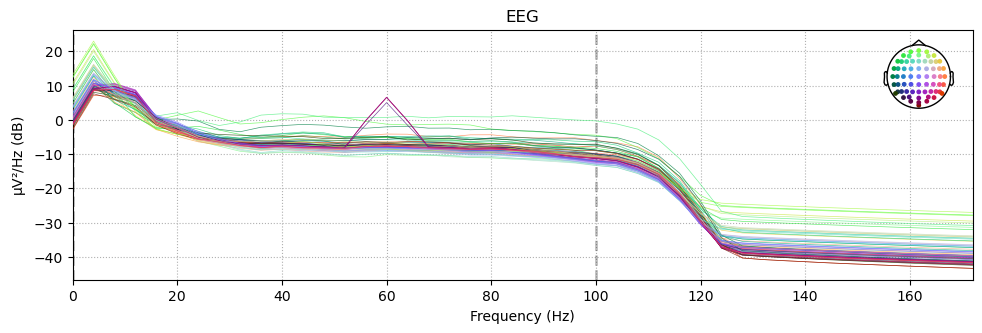

In [6]:
#filter data
bandpass = raw.filter(0.1, 100, fir_design='firwin')
bandpass.plot_psd(fmax = 175)

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 6759 samples (6.601 sec)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished
/Users/scottmcelroy/opt/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


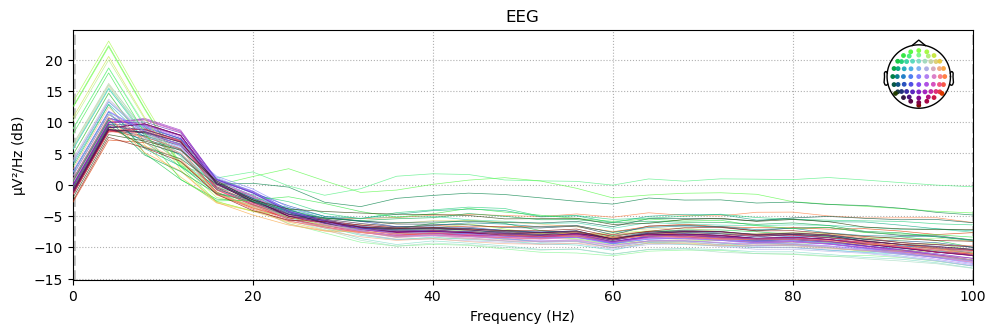

In [7]:
notch = bandpass.notch_filter(60)
notch.plot_psd(fmax=100)

In [8]:
events = mne.find_events(notch)
event_id = {'EOG': 4}
epochs = mne.Epochs(notch, events, preload=True)

Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
51 events found
Event IDs: [    2     8   100   200 65663]
Not setting metadata
51 matching events found
Setting baseline interval to [-0.2001953125, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 51 events and 718 original time points ...
0 bad epochs dropped


/var/folders/ps/wz07wlx570nb502ndwgmzwlc0000gn/T/ipykernel_61632/2033541773.py:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = epochs.average('all').plot(**plot_kwargs)


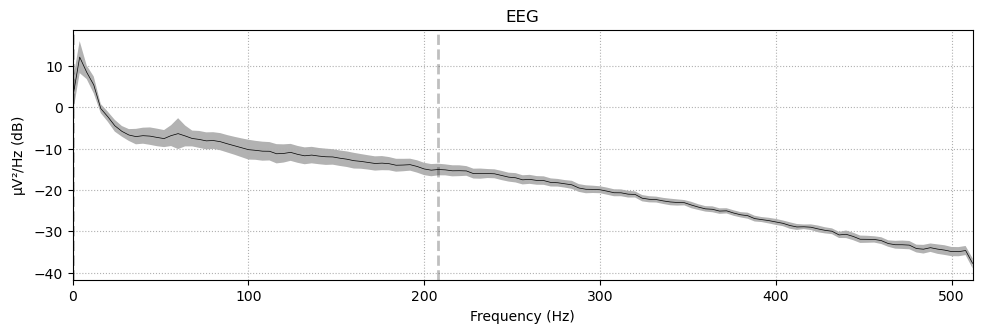

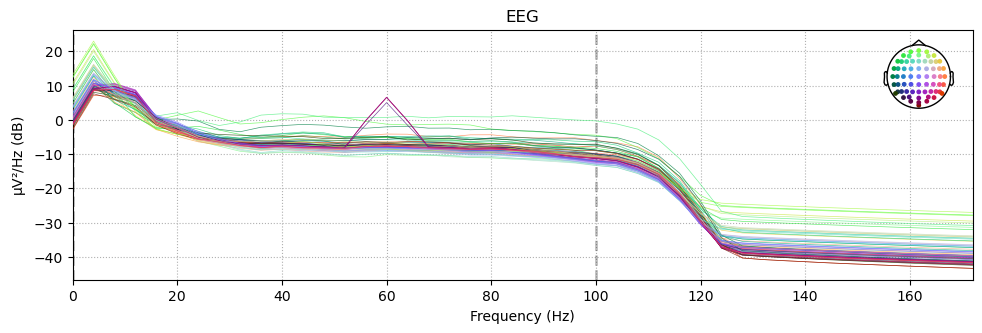

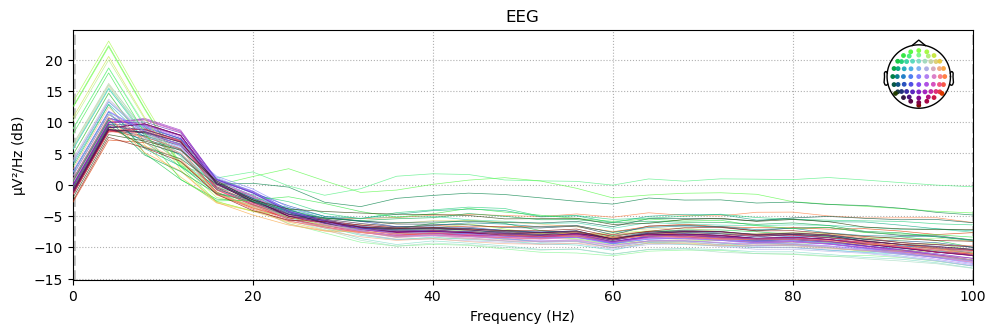

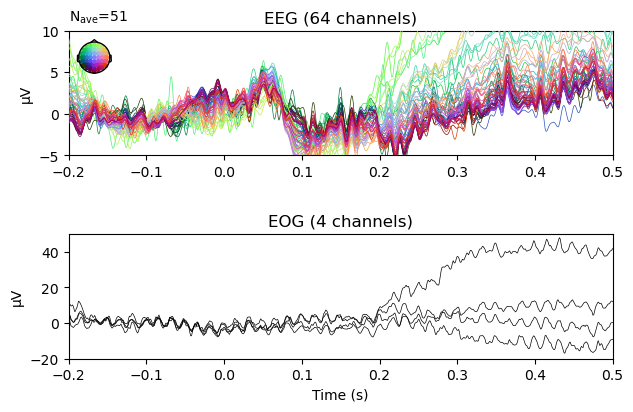

In [9]:
# we'll try to keep a consistent ylim across figures
plot_kwargs = dict(picks='all', ylim=dict(eeg=(-5, 10), eog=(-20, 50)))

# plot the evoked for the EEG and the EOG sensors
fig = epochs.average('all').plot(**plot_kwargs)

No projector specified for this dataset. Please consider the method self.add_proj.


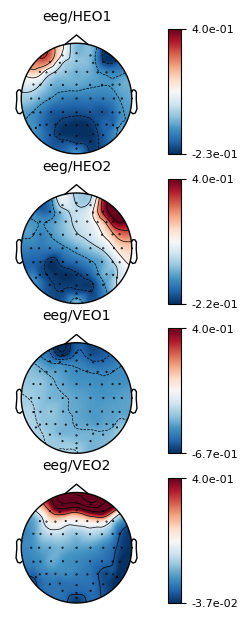

In [10]:
model_plain = mne.preprocessing.EOGRegression(picks='eeg', picks_artifact='eog').fit(epochs)
fig = model_plain.plot(vlim=(None, 0.4)) # regression coefficients as topomap

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)


/var/folders/ps/wz07wlx570nb502ndwgmzwlc0000gn/T/ipykernel_61632/3575809213.py:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = epochs_clean_plain.average('all').plot(**plot_kwargs)


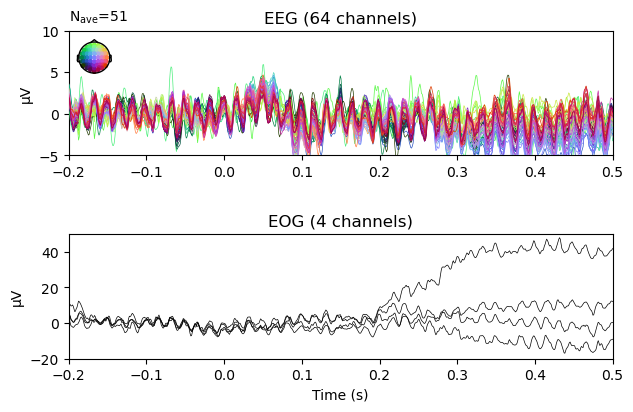

In [11]:
epochs_clean_plain = model_plain.apply(epochs)
# After regression, we should redo the baseline correction
epochs_clean_plain.apply_baseline()
# Show the evoked potential computed on the corrected data
fig = epochs_clean_plain.average('all').plot(**plot_kwargs)
fig.set_size_inches(6, 6)

Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: HEO1, HEO2, VEO2, VEO1, Status
[done]
No projector specified for this dataset. Please consider the method self.add_proj.


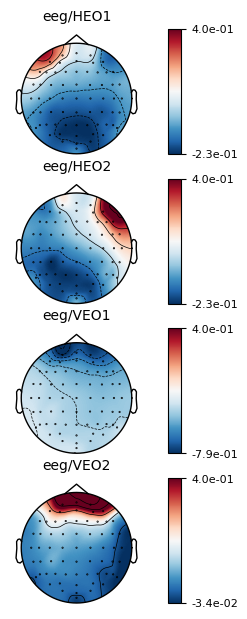

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)


/var/folders/ps/wz07wlx570nb502ndwgmzwlc0000gn/T/ipykernel_61632/2586119417.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = epochs_clean_sub.average('all').plot(**plot_kwargs)


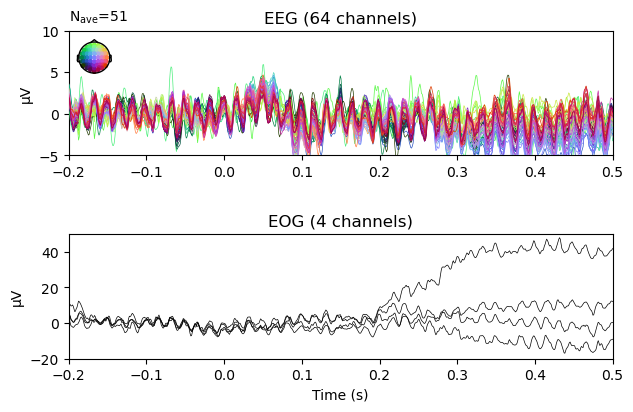

In [12]:
# create epochs with the evoked subtracted out
epochs_sub = epochs.copy().subtract_evoked()

# perform regression
model_sub = mne.preprocessing.EOGRegression(picks='eeg', picks_artifact='eog').fit(epochs_sub)
fig = model_sub.plot(vlim=(None, 0.4))
fig.set_size_inches(3, 2)

# apply the regression coefficients to the original epochs
epochs_clean_sub = model_plain.apply(epochs).apply_baseline()
fig = epochs_clean_sub.average('all').plot(**plot_kwargs)
fig.set_size_inches(6, 6)